## Handwritten Digit Recognition using CNN and MNIST dataset

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical  
from keras.regularizers import l2
from sklearn.metrics import confusion_matrix

# Load MNIST Data

In [3]:

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Display some sample images

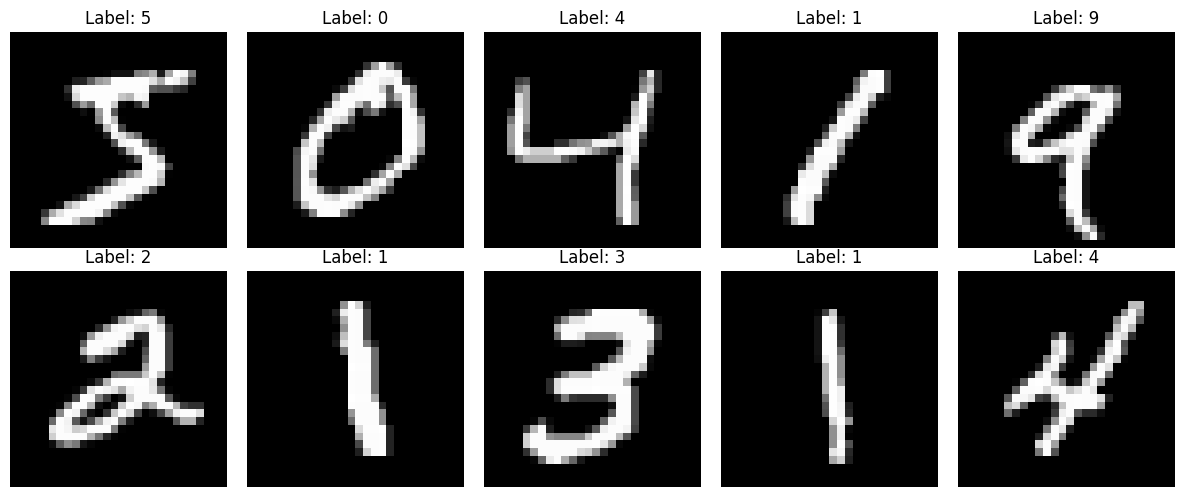

In [4]:

fig, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.ravel()
for i in range(10):
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].set_title(f"Label: {y_train[i]}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

# Plot histogram of label distribution

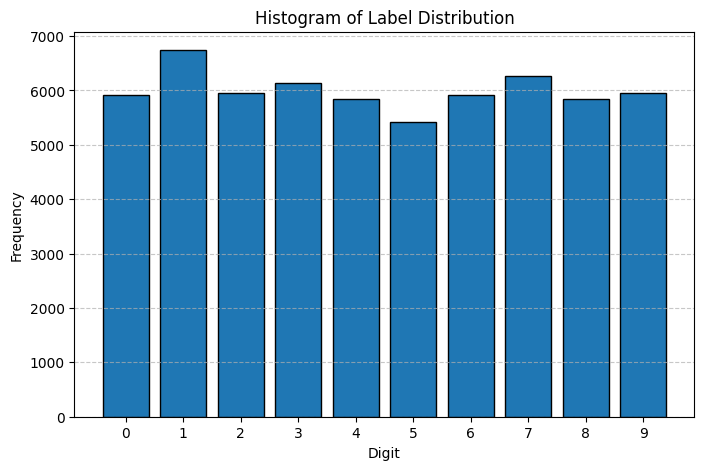

In [5]:
plt.figure(figsize=(8, 5))
plt.hist(y_train, bins=range(11), edgecolor='black', align='left', rwidth=0.8)
plt.title('Histogram of Label Distribution')
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.xticks(range(10))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Average Image for Each Digital Class

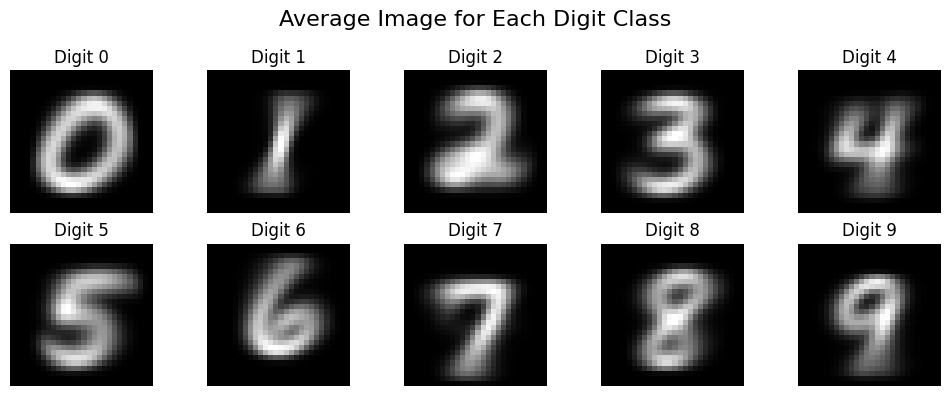

In [6]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(np.mean(X_train[y_train == i], axis=0), cmap='gray')
    plt.axis('off')
    plt.title(f'Digit {i}')
plt.suptitle('Average Image for Each Digit Class', fontsize=16)
plt.tight_layout()
plt.show()

# Mean pixel intensity for each digit class

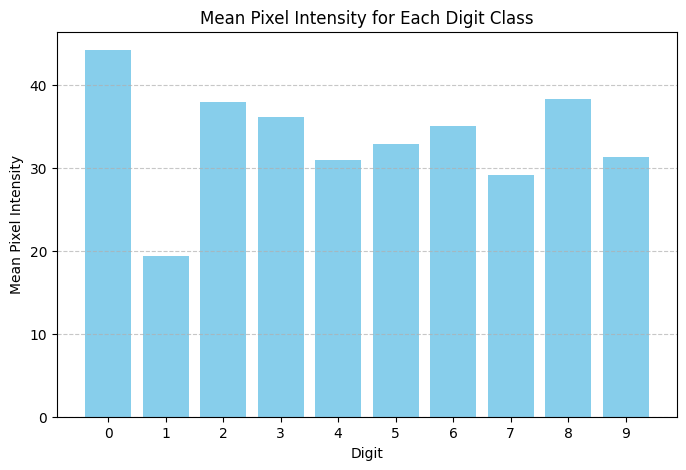

In [7]:
mean_intensity = [np.mean(X_train[y_train == i]) for i in range(10)]
plt.figure(figsize=(8, 5))
plt.bar(range(10), mean_intensity, color='skyblue')
plt.title('Mean Pixel Intensity for Each Digit Class')
plt.xlabel('Digit')
plt.ylabel('Mean Pixel Intensity')
plt.xticks(range(10))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Standard deviation of pixel intensity for each digit class

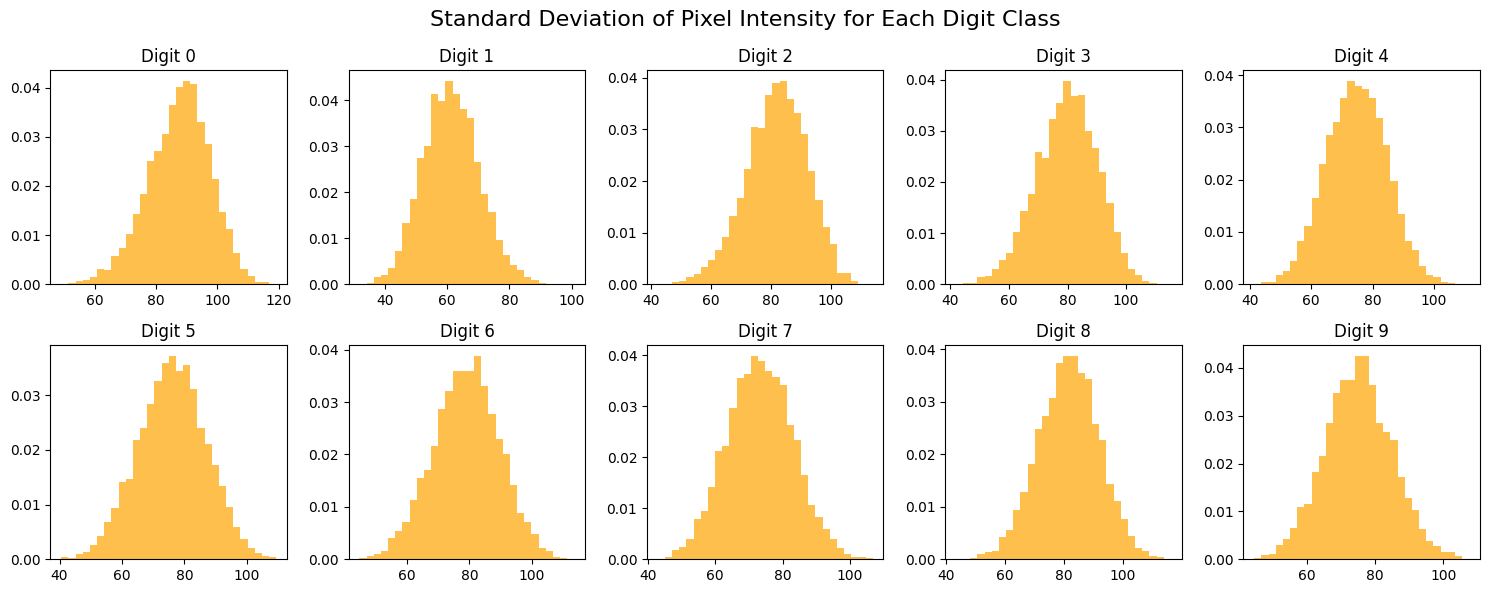

In [8]:

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i in range(10):
    axes[i//5, i%5].hist(np.std(X_train[y_train == i], axis=(1, 2)), bins=30, color='orange', density=True, alpha=0.7)
    axes[i//5, i%5].set_title(f'Digit {i}')
plt.suptitle('Standard Deviation of Pixel Intensity for Each Digit Class', fontsize=16)
plt.tight_layout()
plt.show()

# Plot histogram for pixel intensity of each digit class

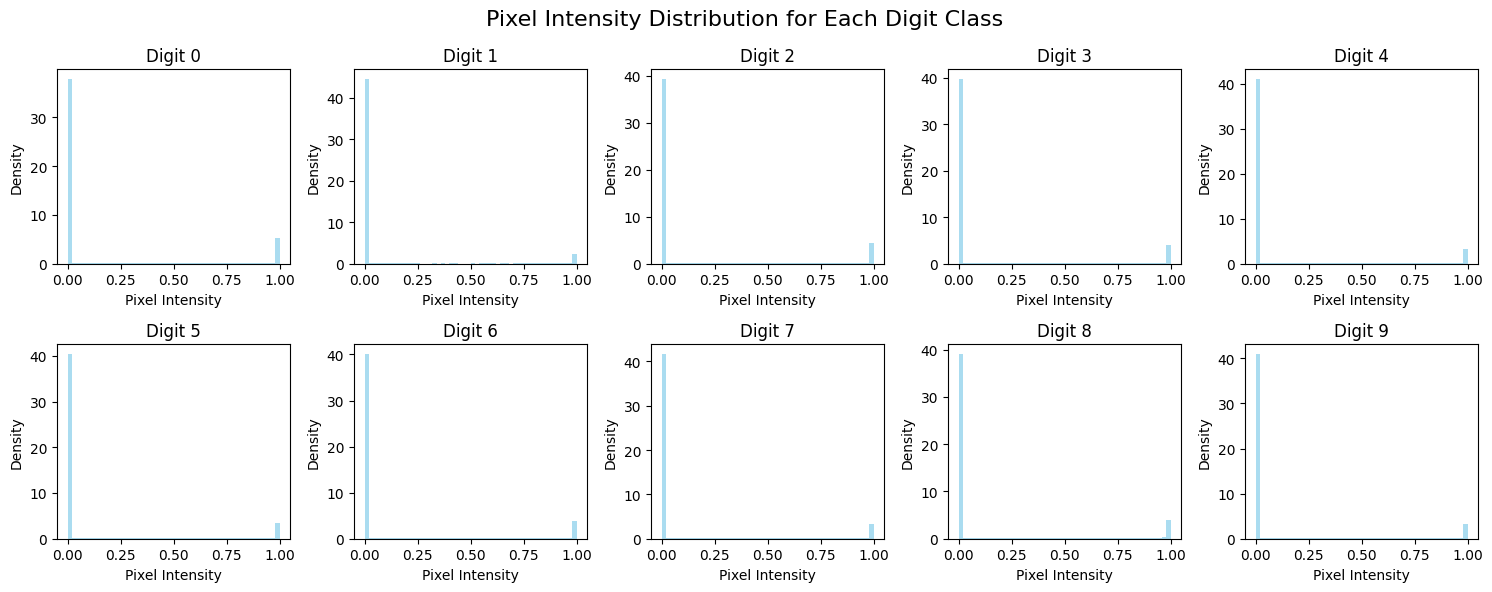

In [9]:
X_train = X_train.reshape((60000, 784)).astype('float32') / 255
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle('Pixel Intensity Distribution for Each Digit Class', fontsize=16)
for i, ax in enumerate(axes.flat):
    digit_data = X_train[y_train == i].flatten()  # Extract pixel intensities for current digit class
    ax.hist(digit_data, bins=50, color='skyblue', density=True, alpha=0.7)
    ax.set_title(f'Digit {i}')
    ax.set_xlabel('Pixel Intensity')
    ax.set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

# Preprocess the data

In [11]:
X_train = X_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
X_test = X_test.reshape((10000, 28, 28, 1)).astype('float32') / 255
y_train = to_categorical(y_train)  
y_test = to_categorical(y_test)

# Data Augmentation

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define data augmentation parameters
data_aug = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create training image data generator
train_datagen = data_aug.flow(X_train, y_train, batch_size=32)

# Create validation data generator (without augmentation for validation data)
val_datagen = ImageDataGenerator(fill_mode='nearest')
val_images, val_labels = next(val_datagen.flow(X_test, y_test, batch_size=32))


# CNN Model Training

In [13]:
# Define a simpler CNN model 
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.45))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.55))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

c:\Users\snfar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
from keras.callbacks import EarlyStopping
# Define the EarlyStopping callback (potentially adjusted patience)
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Compile the model with loss, optimizer, and metrics
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.4073 - loss: 1.6260 - val_accuracy: 0.8857 - val_loss: 0.3686
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8475 - loss: 0.4858 - val_accuracy: 0.9317 - val_loss: 0.2263
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8888 - loss: 0.3512 - val_accuracy: 0.9498 - val_loss: 0.1698
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9103 - loss: 0.2798 - val_accuracy: 0.9581 - val_loss: 0.1440
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9237 - loss: 0.2382 - val_accuracy: 0.9607 - val_loss: 0.1279
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9304 - loss: 0.2187 - val_accuracy: 0.9678 - val_loss: 0.1089
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9370 - loss: 0.1994 - val_accuracy: 0.9679 - val_loss: 0.1054
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9428 - l

# Plot training and validation curves

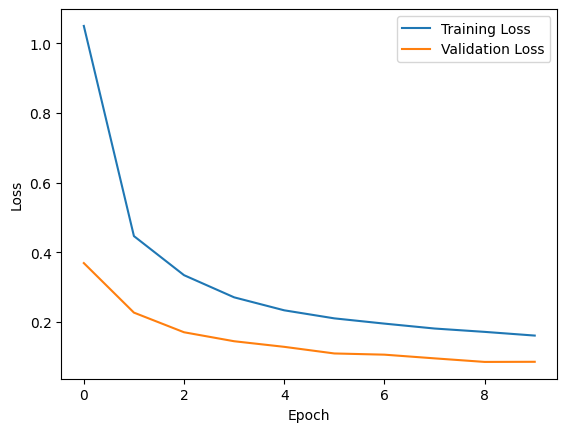

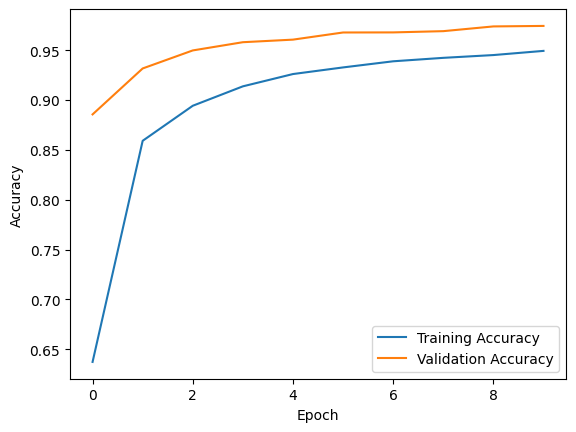

In [15]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the train set

In [16]:
train_loss, train_acc = model.evaluate(X_train, y_train)
print("Train accuracy: ",round(train_acc*100,2),"%")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9760 - loss: 0.0815
Train accuracy:  97.49 %


# Evaluate the model on the test set

In [17]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy: ",round(test_acc*100,2),"%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9458 - loss: 21.9080
Test accuracy:  95.17 %


# Make predictions on training and test sets


In [18]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


# Convert predictions to class labels 


In [19]:
y_pred_train_class = np.argmax(y_pred_train, axis=1)
y_pred_test_class = np.argmax(y_pred_test, axis=1)

# Training Set Evaluation

## Confusion matrix for training data

In [20]:
cm_train = confusion_matrix(y_train.argmax(axis=1), y_pred_train_class)

## Plot confusion matrix

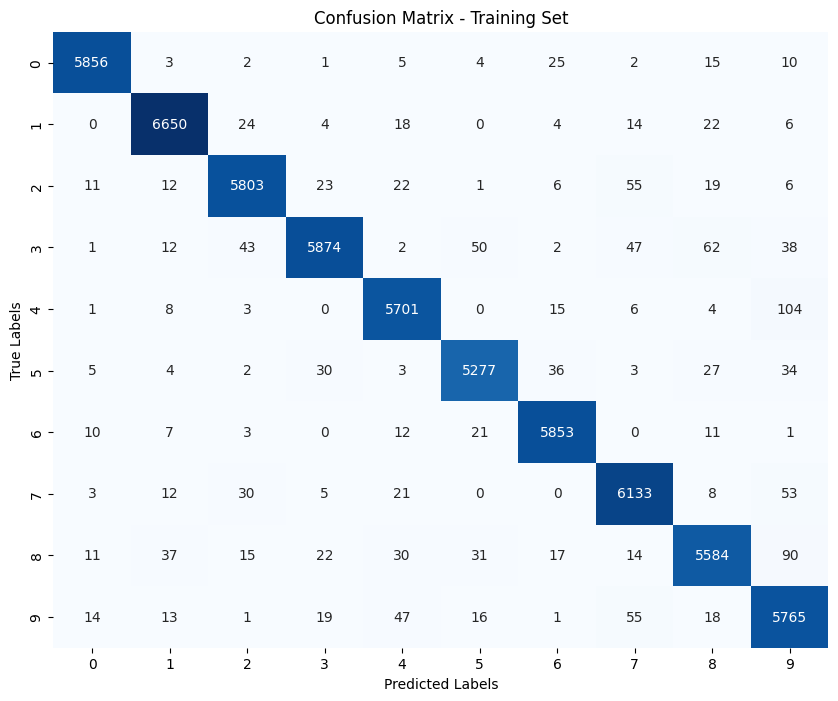

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Calculate precision, recall, and F1 score for each class (training)

In [22]:
num_classes = cm_train.shape[0]
for class_index in range(num_classes):
    true_positives = cm_train[class_index, class_index]
    false_positives = cm_train.sum(axis=0)[class_index] - true_positives
    false_negatives = cm_train.sum(axis=1)[class_index] - true_positives

    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    accuracy_train = np.sum(y_train.argmax(axis=1) == y_pred_train_class) / len(y_train)

    print(f"Training Set - Class {class_index+1} - Accuracy:{accuracy_train:.4f}, - Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1_score:.4f}")

Training Set - Class 1 - Accuracy:0.9749, - Precision: 0.9905, Recall: 0.9887, F1 Score: 0.9896
Training Set - Class 2 - Accuracy:0.9749, - Precision: 0.9840, Recall: 0.9864, F1 Score: 0.9852
Training Set - Class 3 - Accuracy:0.9749, - Precision: 0.9792, Recall: 0.9740, F1 Score: 0.9766
Training Set - Class 4 - Accuracy:0.9749, - Precision: 0.9826, Recall: 0.9581, F1 Score: 0.9702
Training Set - Class 5 - Accuracy:0.9749, - Precision: 0.9727, Recall: 0.9759, F1 Score: 0.9743
Training Set - Class 6 - Accuracy:0.9749, - Precision: 0.9772, Recall: 0.9734, F1 Score: 0.9753
Training Set - Class 7 - Accuracy:0.9749, - Precision: 0.9822, Recall: 0.9890, F1 Score: 0.9856
Training Set - Class 8 - Accuracy:0.9749, - Precision: 0.9690, Recall: 0.9789, F1 Score: 0.9740
Training Set - Class 9 - Accuracy:0.9749, - Precision: 0.9678, Recall: 0.9544, F1 Score: 0.9610
Training Set - Class 10 - Accuracy:0.9749, - Precision: 0.9440, Recall: 0.9691, F1 Score: 0.9564


# Testing Set Evaluation

## Confusion matrix for testing data

In [23]:
cm_test = confusion_matrix(y_test.argmax(axis=1), y_pred_test_class)

## Plot confusion matrix

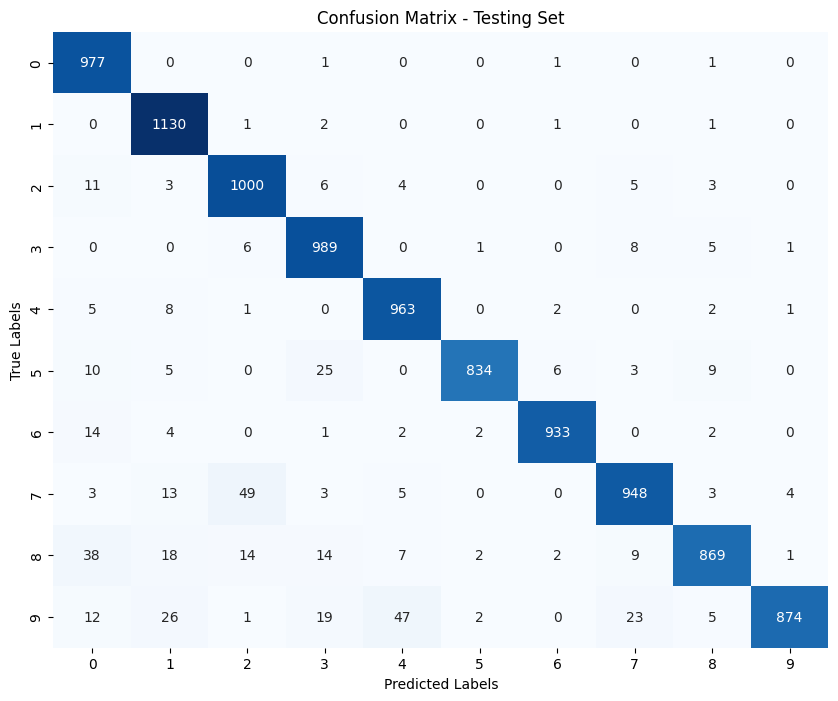

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Testing Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Calculate precision, recall, and F1 score for each class (testing)

In [25]:
num_classes = cm_test.shape[0]
for class_index in range(num_classes):
    true_positives = cm_test[class_index, class_index]
    false_positives = cm_test.sum(axis=0)[class_index] - true_positives
    false_negatives = cm_test.sum(axis=1)[class_index] - true_positives

    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    accuracy_test = np.sum(y_test.argmax(axis=1) == y_pred_test_class) / len(y_test)
    print(f"Testing Set - Class {class_index+1} - Accuracy:{accuracy_test:.4f}, - Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1_score:.4f}")


Testing Set - Class 1 - Accuracy:0.9517, - Precision: 0.9131, Recall: 0.9969, F1 Score: 0.9532
Testing Set - Class 2 - Accuracy:0.9517, - Precision: 0.9362, Recall: 0.9956, F1 Score: 0.9650
Testing Set - Class 3 - Accuracy:0.9517, - Precision: 0.9328, Recall: 0.9690, F1 Score: 0.9506
Testing Set - Class 4 - Accuracy:0.9517, - Precision: 0.9330, Recall: 0.9792, F1 Score: 0.9556
Testing Set - Class 5 - Accuracy:0.9517, - Precision: 0.9368, Recall: 0.9807, F1 Score: 0.9582
Testing Set - Class 6 - Accuracy:0.9517, - Precision: 0.9917, Recall: 0.9350, F1 Score: 0.9625
Testing Set - Class 7 - Accuracy:0.9517, - Precision: 0.9873, Recall: 0.9739, F1 Score: 0.9806
Testing Set - Class 8 - Accuracy:0.9517, - Precision: 0.9518, Recall: 0.9222, F1 Score: 0.9368
Testing Set - Class 9 - Accuracy:0.9517, - Precision: 0.9656, Recall: 0.8922, F1 Score: 0.9274
Testing Set - Class 10 - Accuracy:0.9517, - Precision: 0.9921, Recall: 0.8662, F1 Score: 0.9249


# Prediction

In [26]:
# Randomly select an index from the testing set
import random
index = random.randint(0, len(X_test) - 1)


# Visualize the image

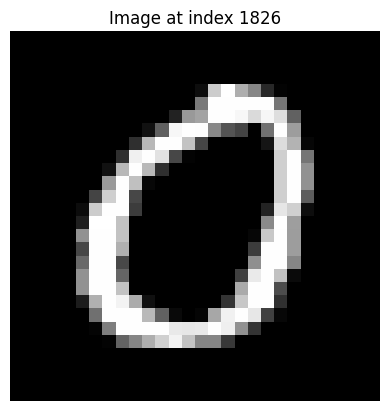

In [27]:
plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
plt.axis('off')
plt.title(f"Image at index {index}")
plt.show()

# Predict the class for the randomly selected image

In [28]:
prediction = model.predict(X_test[index].reshape(1, 28, 28, 1))
predicted_class = np.argmax(prediction)

print(f"\nPredicted class for the randomly selected image at index {index}: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

Predicted class for the randomly selected image at index 1826: 0
